## Example 1 - Creating a Simple Linear Regression




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_features=1, noise=5, n_samples=5000)

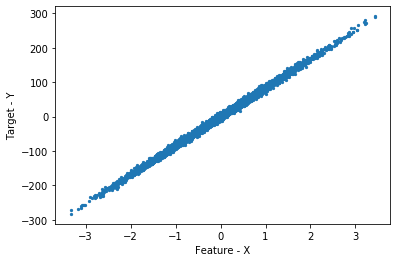

In [5]:
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.scatter(X,Y,s=5)

In [6]:
linear_model = LinearRegression()

In [7]:
linear_model.fit(X,Y)

LinearRegression()

In [8]:
linear_model.coef_

array([84.05042867])

In [9]:
linear_model.intercept_

-0.04615802711799777

## Example 2 - Simple Linear Regression

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


In [11]:
house_df = pd.read_csv('House_data_LR.csv')
house_df.head()

,Unnamed: 0,sqft_living,price
0,0,1180,221900.0
1,1,2570,538000.0
2,2,770,180000.0
3,3,1960,604000.0
4,4,1680,510000.0


In [12]:
house_df.isnull().any()

Unnamed: 0     False
sqft_living    False
price          False
dtype: bool

In [13]:
house_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [14]:
house_df.head()

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


In [15]:
X = house_df.iloc[:, :1].values 
y = house_df.iloc[:, -1].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [17]:
from sklearn.linear_model import LinearRegression
simple_lr = LinearRegression()
simple_lr.fit(X_train, y_train)

#predict the test set results
y_pred = simple_lr.predict(X_test)

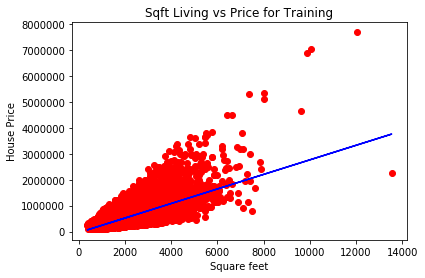

In [18]:
# Training set
plt.scatter(X_train, y_train, color = 'r')
plt.plot(X_train, simple_lr.predict(X_train), color = 'b')
plt.title('Sqft Living vs Price for Training')
plt.xlabel('Square feet')
plt.ylabel('House Price')
plt.show()

Text(0, 0.5, 'House Price')

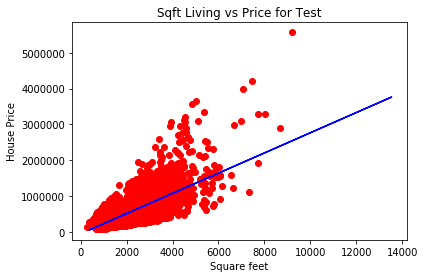

In [19]:
# Test set
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_train, simple_lr.predict(X_train), color = 'b')
plt.title('Sqft Living vs Price for Test')
plt.xlabel('Square feet')
plt.ylabel('House Price')

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
    
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(simple_lr.coef_)-1)*(1 - r2)

rmse, r2, adj_r2,  simple_lr.coef_, simple_lr.intercept_

(257125.13804007217,
 0.5020612063135523,
 0.5020381653254589,
 array([281.4054356]),
 -45441.30813530844)

In [22]:
import numpy as np
x_unseen=np.array([1500]).reshape(1,1)
simple_lr.predict(x_unseen)

array([376666.84526037])

## Example 3 - Multiple Linear Regression

In [23]:
house_mlr = pd.read_csv('House_data.csv')
house_mlr.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
house_mlr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [25]:
house_mlr.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x12cb1aed0>,
 'caps': [<matplotlib.lines.Line2D at 0x12cb22950>,
 'boxes': [<matplotlib.lines.Line2D at 0x12cb1a290>],
 'medians': [<matplotlib.lines.Line2D at 0x12cb1af90>],
 'fliers': [<matplotlib.lines.Line2D at 0x12cb2b8d0>],
 'means': []}

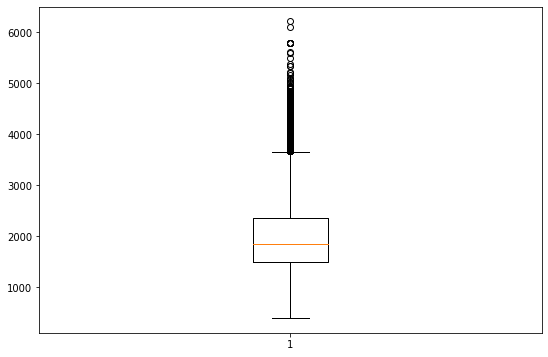

In [26]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(house_mlr['sqft_living15'])

In [27]:
#Generate the correlation matrix

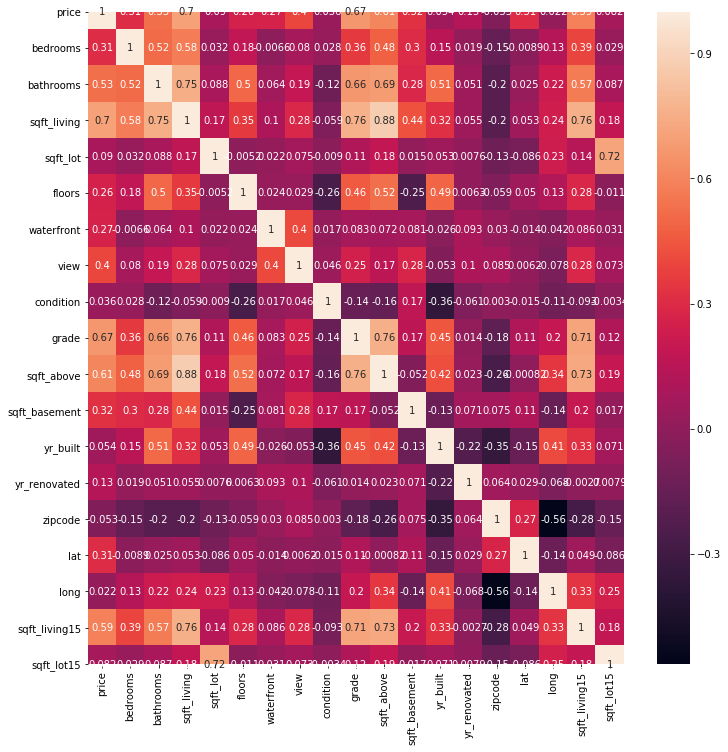

In [28]:
house_mlr.drop(['id', 'date'], axis = 1, inplace = True)
fig, ax = plt.subplots(figsize = (12,12))
ax = sns.heatmap(house_mlr.corr(),annot = True)

In [65]:
# Clean the data now

In [29]:
house_mlr.isnull().any()
house_mlr['basement'] = (house_mlr['sqft_basement'] > 0).astype(int)
house_mlr['renovated'] = (house_mlr['yr_renovated'] > 0).astype(int)

to_drop = ['sqft_basement', 'yr_renovated']
house_mlr.drop(to_drop, axis = 1, inplace = True)

house_mlr.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,basement,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0


In [ ]:
# We will now work on categorical variables. The handling is done using one-hot encoding

In [30]:
categorical_variables = ['waterfront', 'view', 'condition', 'grade', 'floors','zipcode']

house_mlr = pd.get_dummies(house_mlr, columns = categorical_variables, drop_first=True)
house_mlr.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,sqft_living15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1180,1955,47.5112,-122.257,1340,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2170,1951,47.7210,-122.319,1690,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,770,1933,47.7379,-122.233,2720,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1050,1965,47.5208,-122.393,1360,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1680,1987,47.6168,-122.045,1800,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X = house_mlr.iloc[:, 1:].values
y = house_mlr.iloc[:, 0].values

#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

#fit the model
from sklearn.linear_model import LinearRegression
multiple_regression = LinearRegression()
multiple_regression.fit(X_train, y_train)



LinearRegression()

In [32]:
multiple_regression.coef_

array([-1.20074977e+04,  2.26134782e+04,  1.25499581e+02,  2.58529527e-01,
        3.75061569e+01, -1.32800459e+02,  2.87557433e+05, -1.90008450e+05,
        1.75779968e+01, -1.32087358e-01, -1.50955640e+04,  6.44849211e+04,
        5.86157061e+05,  7.59355426e+04,  6.97772240e+04,  1.46588192e+05,
        2.86528010e+05,  1.06643583e+05,  1.11979769e+05,  1.39156620e+05,
        1.85462439e+05, -2.02366462e+05, -2.93427051e+05, -3.35467940e+05,
       -3.43304639e+05, -3.37864985e+05, -3.17018544e+05, -2.43133395e+05,
       -1.26477201e+05,  8.27420894e+04,  4.57568133e+05,  1.65875000e+06,
       -1.23554640e+04, -3.31822534e+04,  5.30959459e+04, -8.66862406e+04,
       -7.04947652e+04,  1.87925639e+04, -9.37275214e+03,  6.93045185e+05,
        2.55820521e+05,  2.02671931e+05,  1.92950888e+05,  2.03217281e+05,
        9.77950132e+04,  3.10561874e+04,  7.45230913e+04,  4.14733166e+04,
        7.50115898e+04, -3.96437331e+04,  1.72379660e+05,  1.53881504e+05,
        2.35167135e+04,  

In [33]:
y_pred = multiple_regression.predict(X_test)

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

adj_r2 = 1 - float(len(y)-1)/(len(y)-len(multiple_regression.coef_)-1)*(1 - r2)

rmse, r2, adj_r2

(147274.98522602883, 0.8366403242154088, 0.8358351477235848)

## Decision Tree

In [35]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [36]:
petrol_data = pd.read_csv('petrol_consumption.csv')  
petrol_data.head(5)  

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [37]:
petrol_data.describe()  

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [38]:
X = petrol_data.drop('Petrol_Consumption', axis=1)  
y = petrol_data['Petrol_Consumption']  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  

In [39]:
from sklearn.tree import DecisionTreeRegressor  
decision_regressor = DecisionTreeRegressor()  
decision_regressor.fit(X_train, y_train)  

DecisionTreeRegressor()

In [40]:
y_pred = decision_regressor.predict(X_test)
result_df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
result_df  

,Actual,Predicted
29,534,541.0
4,410,414.0
26,577,574.0
30,571,554.0
32,577,574.0
37,704,554.0
34,487,648.0
40,587,524.0
7,467,414.0
10,580,464.0


In [41]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

###The mean absolute error for our algorithm is 50.9, which is less than 10 percent of the mean of all the values in 
###the 'Petrol_Consumption' column. This means that our algorithm did a fine prediction job.

Mean Absolute Error: 57.7
Mean Squared Error: 6902.7
Root Mean Squared Error: 83.08248912977993


## Random Forest

In [51]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [52]:
petrol_data = pd.read_csv('petrol_consumption.csv')  
X = petrol_data.drop('Petrol_Consumption', axis=1)  
y = petrol_data['Petrol_Consumption']  
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  

In [53]:
## Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
randomForestModel = RandomForestClassifier(n_estimators=200, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
randomForestModel.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=200)

In [54]:
rf_predictions = randomForestModel.predict(X_test)

In [55]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_predictions)))  

Mean Absolute Error: 55.7
Mean Squared Error: 5066.7
Root Mean Squared Error: 71.18075582627652


In [56]:
feature_list=X_train.columns

In [57]:
# Get numerical feature importances
importances = list(randomForestModel.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Average_income       Importance: 0.29
Variable: Paved_Highways       Importance: 0.28
Variable: Population_Driver_licence(%) Importance: 0.28
Variable: Petrol_tax           Importance: 0.15


In [58]:
type(feature_list)
feature_list

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)'],
      dtype='object')

In [59]:
# New random forest with only the two most important variables
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
rf_most_important = RandomForestRegressor(n_estimators= 500, random_state=5)
# Extract the two most important features
important_indices = [feature_list[2], feature_list[1]]
train_important = X_train.loc[:, ['Paved_Highways','Average_income','Population_Driver_licence(%)']]
test_important = X_test.loc[:, ['Paved_Highways','Average_income','Population_Driver_licence(%)']]
# Train the random forest
rf_most_important.fit(train_important, y_train)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
predictions

array([605.83 , 484.104, 623.094, 589.88 , 628.962, 607.238, 604.546,
       572.176, 473.598, 510.536])

In [61]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))  

Mean Absolute Error: 56.80640000000001
Mean Squared Error: 4410.0591032
Root Mean Squared Error: 66.40827586378072


## Feature Selection using decision tree

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
feature_df = pd.read_csv('House_data.csv')
feature_df = feature_df.head(100)


In [67]:
feature_df['basement'] = (feature_df['sqft_basement'] > 0).astype(int)
feature_df['renovated'] = (feature_df['yr_renovated'] > 0).astype(int)
to_drop = ['id', 'date', 'sqft_basement', 'yr_renovated']
feature_df.drop(to_drop, axis = 1, inplace = True)
cat_cols = ['waterfront', 'view', 'condition', 'grade', 'floors']
feature_df = pd.get_dummies(feature_df, columns = cat_cols, drop_first=True)




In [68]:
y = feature_df.iloc[:, 0].values
X = feature_df.iloc[:, 1:].values

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
tree_clf = ExtraTreesClassifier()
tree_clf.fit(X, y)

tree_clf.feature_importances_

array([0.05111557, 0.04870407, 0.07218447, 0.07454318, 0.07292978,
       0.06909133, 0.07191835, 0.07523493, 0.07514936, 0.06650817,
       0.07042296, 0.02952349, 0.00909336, 0.00112499, 0.00429427,
       0.0138212 , 0.00459512, 0.00367572, 0.02750055, 0.0233373 ,
       0.01329834, 0.00901577, 0.02188948, 0.01966656, 0.01392054,
       0.00794514, 0.00306664, 0.01704242, 0.02383292, 0.00555402])

In [70]:
importances = tree_clf.feature_importances_
feature_names = feature_df.iloc[:, 1:].columns.tolist()
feature_names
feature_imp_dir = dict(zip(feature_names, importances))
features = sorted(feature_imp_dir.items(), key=lambda x: x[1], reverse=True)
feature_imp_dir

{'bedrooms': 0.051115572253446984,
 'bathrooms': 0.0487040743049994,
 'sqft_living': 0.07218447118283099,
 'sqft_lot': 0.07454317889459926,
 'sqft_above': 0.07292977707961767,
 'yr_built': 0.06909133093495655,
 'zipcode': 0.07191834521154579,
 'lat': 0.07523492694381469,
 'long': 0.07514936314834944,
 'sqft_living15': 0.06650816878222311,
 'sqft_lot15': 0.07042295816941467,
 'basement': 0.029523491318632855,
 'renovated': 0.009093355518818676,
 'waterfront_1': 0.0011249930384094162,
 'view_2': 0.004294267380169407,
 'view_3': 0.013821203324907652,
 'view_4': 0.004595117536208862,
 'condition_2': 0.00367571982846641,
 'condition_3': 0.027500553363767083,
 'condition_4': 0.023337301577462624,
 'condition_5': 0.013298337773889585,
 'grade_6': 0.009015772608055597,
 'grade_7': 0.021889476752509417,
 'grade_8': 0.019666562899467475,
 'grade_9': 0.013920537364109958,
 'grade_10': 0.00794514371114262,
 'grade_11': 0.0030666443066808646,
 'floors_1.5': 0.01704241855745838,
 'floors_2.0': 0.023

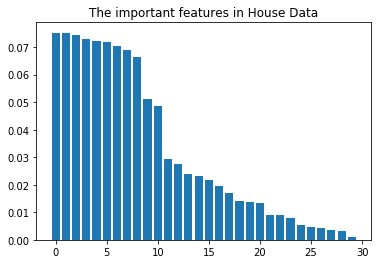

In [71]:
plt.bar(range(len(features)), [imp[1] for imp in features], align='center')
plt.title('The important features in House Data');

In [72]:
from sklearn.feature_selection import SelectFromModel
abc = SelectFromModel(tree_clf, prefit = True)
x_updated = abc.transform(X)
print('Total Features count:', np.array(X).shape[1])
print('Selected Features: ' ,np.array(x_updated).shape[1])

Total Features count: 30
Selected Features:  11


![](img/questions-01.png)